In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import pydicom
import os
import pylidc as pl

In [2]:
pydicom.__version__

'2.1.2'

In [3]:
img_path = "../COVID-19/manifest-1614603893139/LIDC-IDRI/LIDC-IDRI-0011/01-01-2000-73568/3000559.000000-23138/1-001.dcm"
img_path

'../COVID-19/manifest-1614603893139/LIDC-IDRI/LIDC-IDRI-0011/01-01-2000-73568/3000559.000000-23138/1-001.dcm'

In [4]:
lung = pydicom.dcmread(img_path)

In [5]:
print(lung)#view the content of the data

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 206
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.6279.6001.319752382125723119989566570228
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002, 0013) Implementation Version Name         SH: '0.5'
(0002, 0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.6279.6001.31975

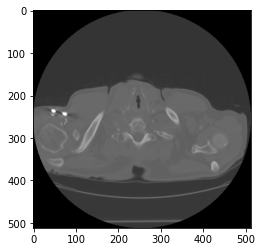

In [6]:
slice = lung.pixel_array
slice[slice == -2000] = 0 #update the intensity values of -2000 with 0 because they are the pixels that fall outside of the scanner bounds
plt.imshow(slice, cmap=plt.cm.gray)

In [7]:
filename = ["1-"+str(i//100)+str((i//10)%10)+str(i%10)+".dcm" for i in range(1,129)]

In [8]:
def read_ct_scans(folder_name):
    slices = []
    for file in filename:
        slices.append(pydicom.dcmread(folder_name+file))
        print(file)
    slices = np.stack([s.pixel_array for s in slices])
    slices[slices == -2000] = 0
    return slices

In [9]:
folder_name = "../COVID-19/manifest-1614603893139/LIDC-IDRI/LIDC-IDRI-0011/01-01-2000-73568/3000559.000000-23138/"
ct_scan = read_ct_scans(folder_name)

1-001.dcm
1-002.dcm
1-003.dcm
1-004.dcm
1-005.dcm
1-006.dcm
1-007.dcm
1-008.dcm
1-009.dcm
1-010.dcm
1-011.dcm
1-012.dcm
1-013.dcm
1-014.dcm
1-015.dcm
1-016.dcm
1-017.dcm
1-018.dcm
1-019.dcm
1-020.dcm
1-021.dcm
1-022.dcm
1-023.dcm
1-024.dcm
1-025.dcm
1-026.dcm
1-027.dcm
1-028.dcm
1-029.dcm
1-030.dcm
1-031.dcm
1-032.dcm
1-033.dcm
1-034.dcm
1-035.dcm
1-036.dcm
1-037.dcm
1-038.dcm
1-039.dcm
1-040.dcm
1-041.dcm
1-042.dcm
1-043.dcm
1-044.dcm
1-045.dcm
1-046.dcm
1-047.dcm
1-048.dcm
1-049.dcm
1-050.dcm
1-051.dcm
1-052.dcm
1-053.dcm
1-054.dcm
1-055.dcm
1-056.dcm
1-057.dcm
1-058.dcm
1-059.dcm
1-060.dcm
1-061.dcm
1-062.dcm
1-063.dcm
1-064.dcm
1-065.dcm
1-066.dcm
1-067.dcm
1-068.dcm
1-069.dcm
1-070.dcm
1-071.dcm
1-072.dcm
1-073.dcm
1-074.dcm
1-075.dcm
1-076.dcm
1-077.dcm
1-078.dcm
1-079.dcm
1-080.dcm
1-081.dcm
1-082.dcm
1-083.dcm
1-084.dcm
1-085.dcm
1-086.dcm
1-087.dcm
1-088.dcm
1-089.dcm
1-090.dcm
1-091.dcm
1-092.dcm
1-093.dcm
1-094.dcm
1-095.dcm
1-096.dcm
1-097.dcm
1-098.dcm
1-099.dcm
1-100.dcm


In [10]:
def plot_ct_scans(scan):
    fig, ax = plt.subplots(scan.shape[0]//8, 8, figsize=(36, 36))
    for i in range(0,scan.shape[0]):
        #print(scan.shape[0]//8,8,i%8+1)
        #plt.subplot(scan.shape[0]//8,8,i+1)
        #plt.imshow(scan[i],cmap=plt.cm.bone)
        #ax[i,i%8].axis("off")
        #print(i//8,i%8)
        ax[i//8,i%8].imshow(scan[i],cmap=plt.cm.bone)

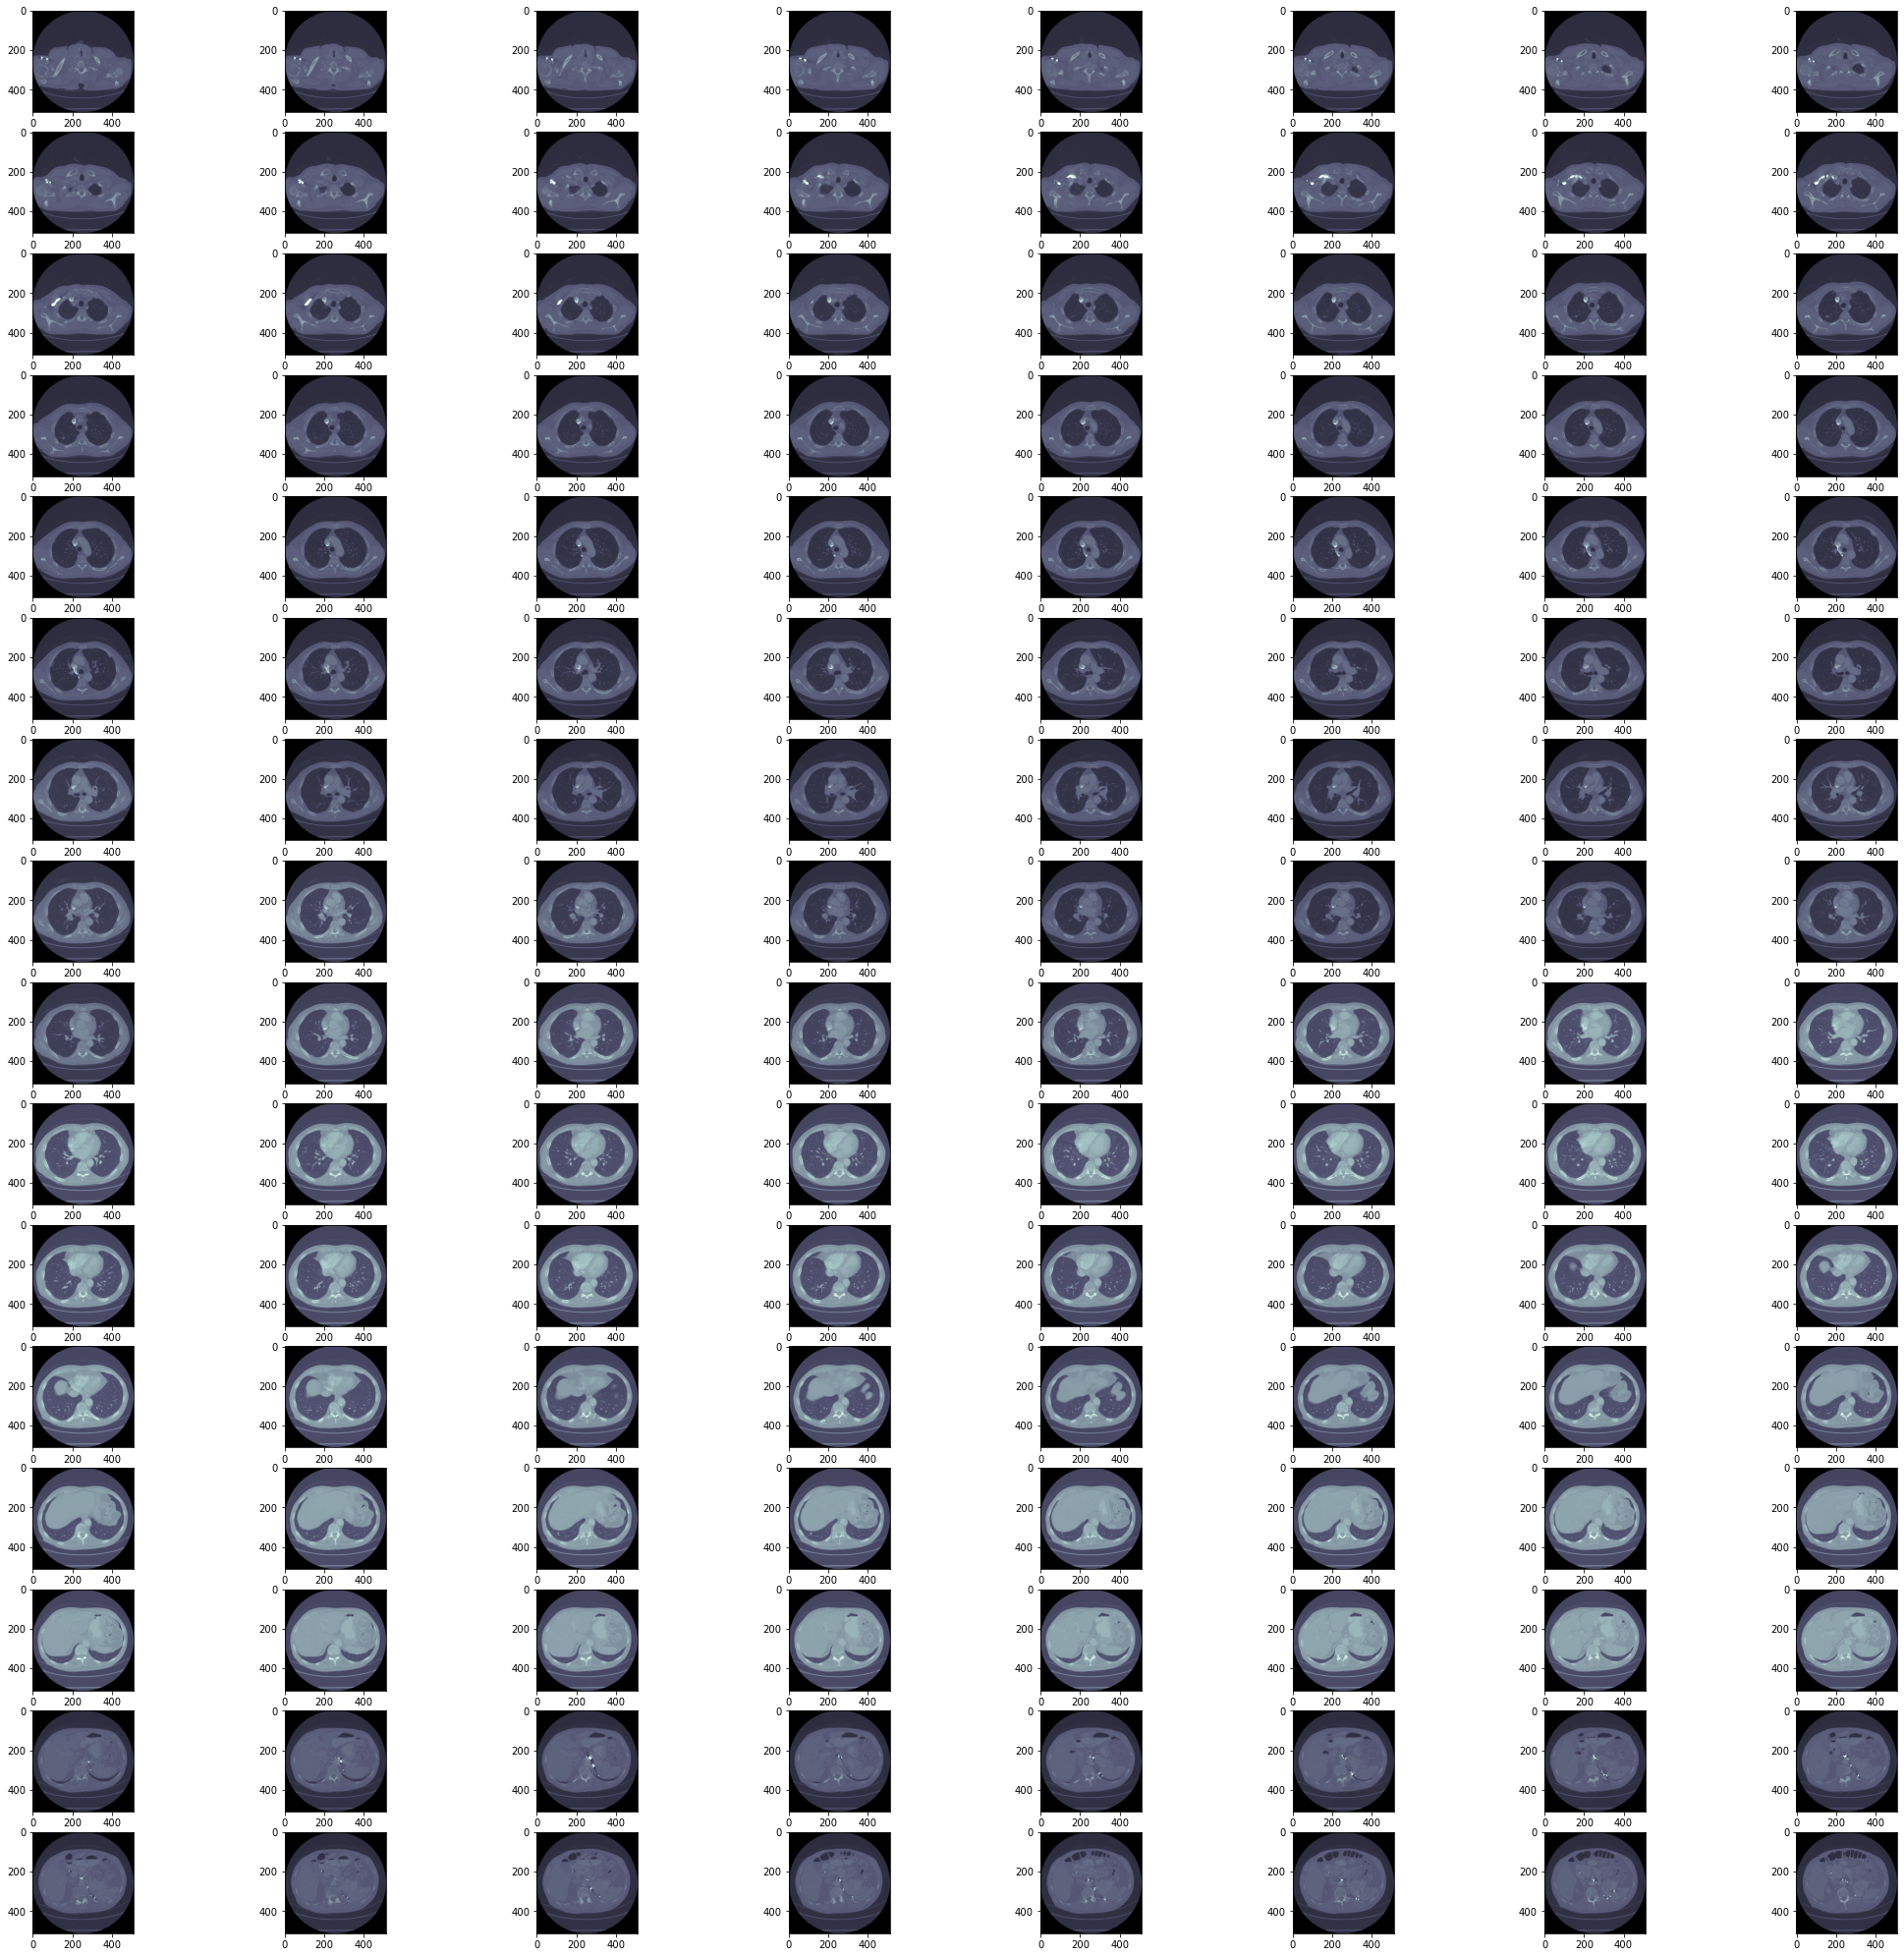

In [11]:
plot_ct_scans(ct_scan)

In [21]:
ann = pl.query(pl.Annotation).first()
print(ann.scan.patient_id)

LIDC-IDRI-0078


Loading dicom files ... This may take a moment.


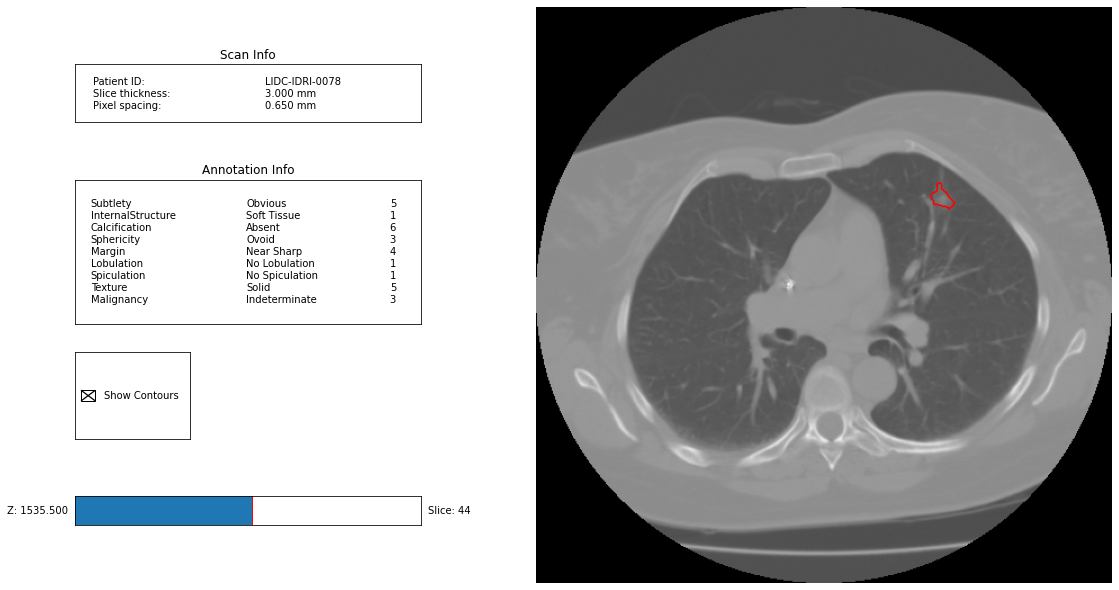

In [22]:
ann.visualize_in_scan()